# All the results and visualizations for the Sampta Paper

In [1]:
#Import everything
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

## Checking if we have our data run

### Regression

In [2]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/GRAE_Data")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)

File Length: 2654


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Parameter STD
2162,SPUD,balance_scale,skewed,0.3,"{'knn': 28, 'OD_method': 'mean', 'agg_method':...",{'42': 0.6672},{'42': 0.0192},{'42': 0.687},{'42': 0.632},{'42': 0.696},{'42': 0.648},{'42': 0.704},{'42': 0.6179775910364147},{'42': 0.6715312810327706},{'42': 0.6054623655913979},{'42': 0.6677076791321724},"{'42': {'RF-OOB': 0.664, 'KNN_A': 0.632, 'RF_A...","{'knn': 0.05090917402590618, 'OD_method': 0.03..."
1611,NAMA,parkinsons,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.6051282051282051, '1738': 0.579487179...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.8878205128205128, '1738': 0.871794871...","{'42': 0.9230769230769231, '1738': 0.948717948...","{'42': 0.8974358974358975, '1738': 0.871794871...","{'42': 0.8974358974358975, '1738': 0.871794871...","{'42': 0.8461538461538461, '1738': 0.871794871...","{'42': 0.8799396681749624, '1738': 0.852071005...","{'42': 0.8356643356643357, '1738': 0.862026862...","{'42': 0.9143095710259889, '1738': 0.946339950...","{'42': 0.8799396681749624, '1738': 0.852071005...","{'42': {'RF-OOB': 0.875, 'KNN_A': 0.8461538461...","{'OD_method': 0.01025641025641022, 'agg_method..."
902,RF-MASH-,ComputerHardware,distort,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.9276173400992423, '1738': 0.853890757...","{'42': 0.07252581213800051, '1738': 0.06574941...","{'42': 0.6943956930841968, '1738': 0.875109138...","{'42': 0.6765157683341201, '1738': 0.618013777...","{'42': 0.6517899033458792, '1738': -0.14661081...","{'42': 0.762889227981638, '1738': 0.2796822263...","{'42': 0.6235469553646122, '1738': -1.04063955...","{'42': 0.6831164233140765, '1738': 0.518207038...","{'42': 0.860744965793725, '1738': 0.8722166885...","{'42': 0.7978948138006158, '1738': 0.377368018...","{'42': 0.8278273377694227, '1738': 0.653806535...","{'42': {'RF-OOB': 0.7949432221294334, 'KNN_A':...","{'knn': 0.8339363210044058, 'page_rank': 0.276..."
1974,RF-MASH,heart_failure,distort,0.3,"{'knn': 20, 'page_rank': 'off-diagonal', 'DTM'...","{'42': 0.725752508361204, '1738': 0.7224080267...","{'42': 0.011409268352702989, '1738': 0.0114092...","{'42': 0.8849372384937239, '1738': 0.870292887...","{'42': 0.6166666666666667, '1738': 0.866666666...","{'42': 0.75, '1738': 0.8833333333333333, '5271...","{'42': 0.5833333333333334, '1738': 0.866666666...","{'42': 0.5833333333333334, '1738': 0.833333333...","{'42': 0.4298245614035087, '1738': 0.860740740...","{'42': 0.4573874950219036, '1738': 0.820910973...","{'42': 0.5007964954201513, '1738': 0.866666666...","{'42': 0.731718898385565, '1738': 0.8822361546...","{'42': {'RF-OOB': 0.893305439330544, 'KNN_A': ...","{'connection_limit': 0.0, 'threshold': 0.0, 'e..."
1223,MALI-RF,ionosphere,even,0.3,"{'knn': 2, 'mu': 0.75, 't': 3, 'transition_onl...",{'42': 0.46153846153846156},{'42': 0.3211662243001274},{'42': 0.5928571428571429},{'42': 0.5633802816901409},{'42': 0.6056338028169014},{'42': 0.5633802816901409},{'42': 0.6197183098591549},{'42': 0.436492830859028},{'42': 0.48812250985313776},{'42': 0.436492830859028},{'42': 0.5007682458386684},"{'42': {'RF-OOB': 0.6017857142857143, 'KNN_A':...",{}


In [3]:
cls_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
cls_bl['csv_file'] = cls_bl['csv_file'].str.replace('.csv', '')
cls_bl.sample(5)

,csv_file,split,A_Classification_Score,B_Classification_Score
648,heart_failure,skewed,0.616667,0.733333
88,car,skewed,0.618497,0.838150
95,breast_cancer,random,0.878571,0.964286
713,tic-tac-toe,skewed,0.588542,0.760417
144,chess,distort,0.937500,0.942187


In [4]:
reg_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/TrainTestBaselines.csv", index_col=0).drop(columns = ["Method"])#.rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
reg_bl['csv_file'] = reg_bl['csv_file'].str.replace('.csv', '')
reg_bl.sample(5)


,csv_file,split,A_Classification_Score,B_Classification_Score
209,SML2010,distort,0.987287,0.961928
108,ConcreteSlumpTest,skewed,-0.088198,0.636359
34,CommunityCrime,distort,0.511443,0.509136
49,Parkinsons,distort,0.772005,0.724990
240,CommunityCrime,random,0.509877,0.534489


In [5]:
#This helps me to see where my tests have failed
proc_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb A", "Nearest Neighbor A", "Nearest Neighbor (F1 score or RMSE) A", "Random Forest (F1 score or RMSE) A",
                                                      "Random Forest Emb B", "Nearest Neighbor B", "Nearest Neighbor (F1 score or RMSE) B", "Random Forest (F1 score or RMSE) B"]:
    proc_df[columns] = [np.mean(list(d.values())) for d in proc_df[columns].values]

proc_df["Combined_Metric"] = proc_df["CE"] - proc_df["FOSCTTM"]

proc_df = proc_df.merge(pd.concat([cls_bl, reg_bl], ignore_index=True), how = "left")
#proc_df = proc_df.merge(reg_bl, how = "left")

results_df = plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,0.579510,-0.183539,0.900176,0.355952,0.640715,0.769619,0.774758,-0.159360,-0.179408,0.900512,0.845670,NaN,-0.355119,-0.128310,0.500979,0.827033,0.876427
1,hill_valley,0.733117,0.519168,0.734996,0.546205,0.696138,0.691129,0.744248,0.570952,0.544554,0.738520,0.279086,0.439369,0.463854,0.547286,0.729702,0.606557,0.598361
2,CommunityCrime,0.497917,-0.006658,0.793918,0.535578,0.710046,0.712440,0.329513,-0.142984,-0.208392,0.786104,0.740419,NaN,-0.290245,-0.139376,0.535960,0.628443,0.639682
3,heart_disease,0.739134,0.556229,0.779095,0.626263,0.717172,0.717172,0.554121,0.515140,0.577778,0.766037,0.705587,0.663362,0.296210,0.693093,0.676768,0.683333,0.700000
4,Medicaldataset,0.764131,0.555572,0.773290,NaN,0.752287,0.755764,0.659481,NaN,NaN,0.787405,NaN,NaN,0.158345,0.516046,0.958302,0.647727,0.810606
5,Automobile,0.757670,0.246401,0.882649,0.715318,0.767879,0.821432,0.817108,0.343892,0.025612,0.881048,0.804208,NaN,-0.139808,0.795496,0.856611,0.862563,0.839518
6,audiology,0.717747,0.526252,0.864377,0.714571,0.775679,0.753457,0.725285,0.504321,0.321053,0.861876,0.805604,0.672867,0.111884,0.805357,0.749474,0.763158,0.763158
7,heart_failure,0.774903,0.699666,0.826655,0.749164,0.779698,0.770797,0.720613,0.658863,0.745819,0.830920,0.773136,0.724074,0.422953,0.727162,0.890970,0.816667,0.833333
8,ConcreteSlumpTest,0.513335,0.447216,0.890893,0.623485,0.780732,0.751162,0.669869,0.123935,-0.034983,0.816872,0.875523,NaN,-0.171756,0.852770,0.766478,0.781249,0.840009
9,hepatitis,0.784776,0.671014,0.803720,0.760870,0.780923,0.789388,0.653340,0.695652,0.569544,0.778977,0.758580,0.761269,0.289319,0.755093,0.814493,0.678571,0.750000


In [6]:
# Filter proc_df to create classification and regression dataframes
classification_df = proc_df[proc_df['csv_file'].isin(cls_bl['csv_file'].unique())]
regression_df = proc_df[proc_df['csv_file'].isin(reg_bl['csv_file'].unique())]

# Visualizations

In [7]:
results_df.columns

Index(['csv_file', 'SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'],
      dtype='object')

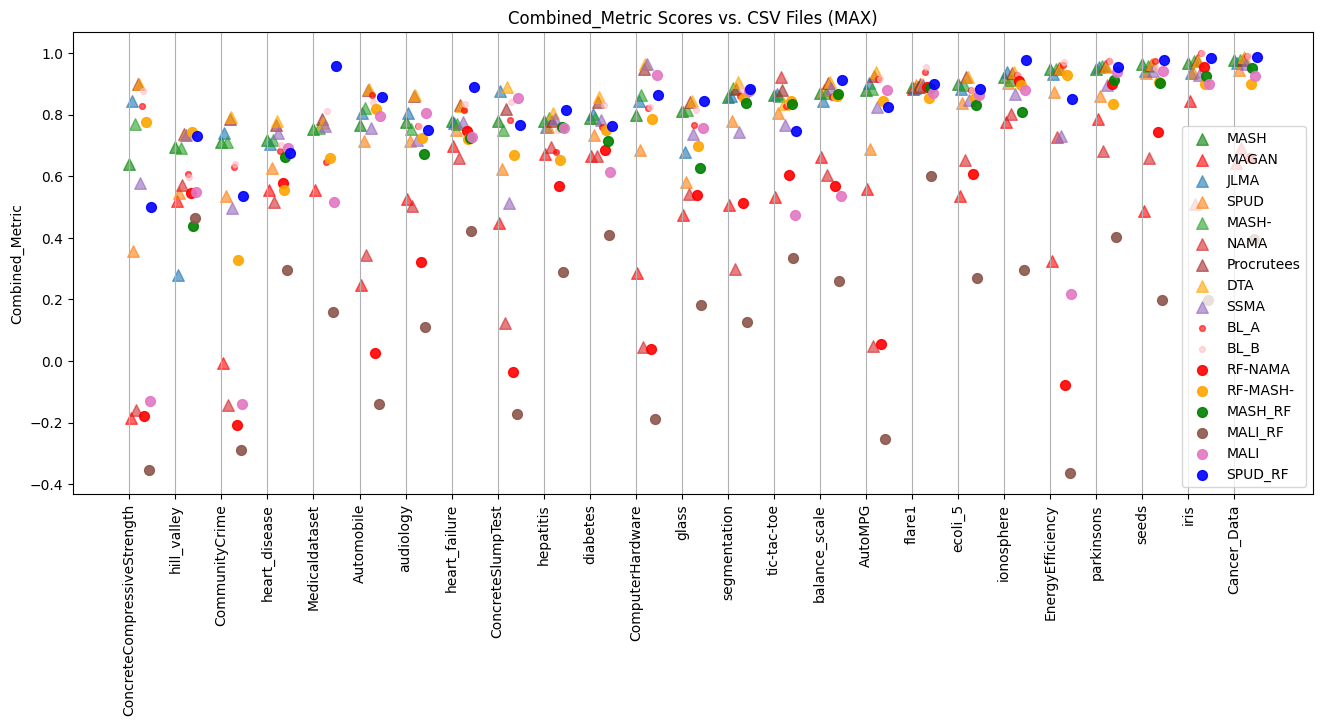

In [8]:
plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=False, plot_methods= ['SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'])

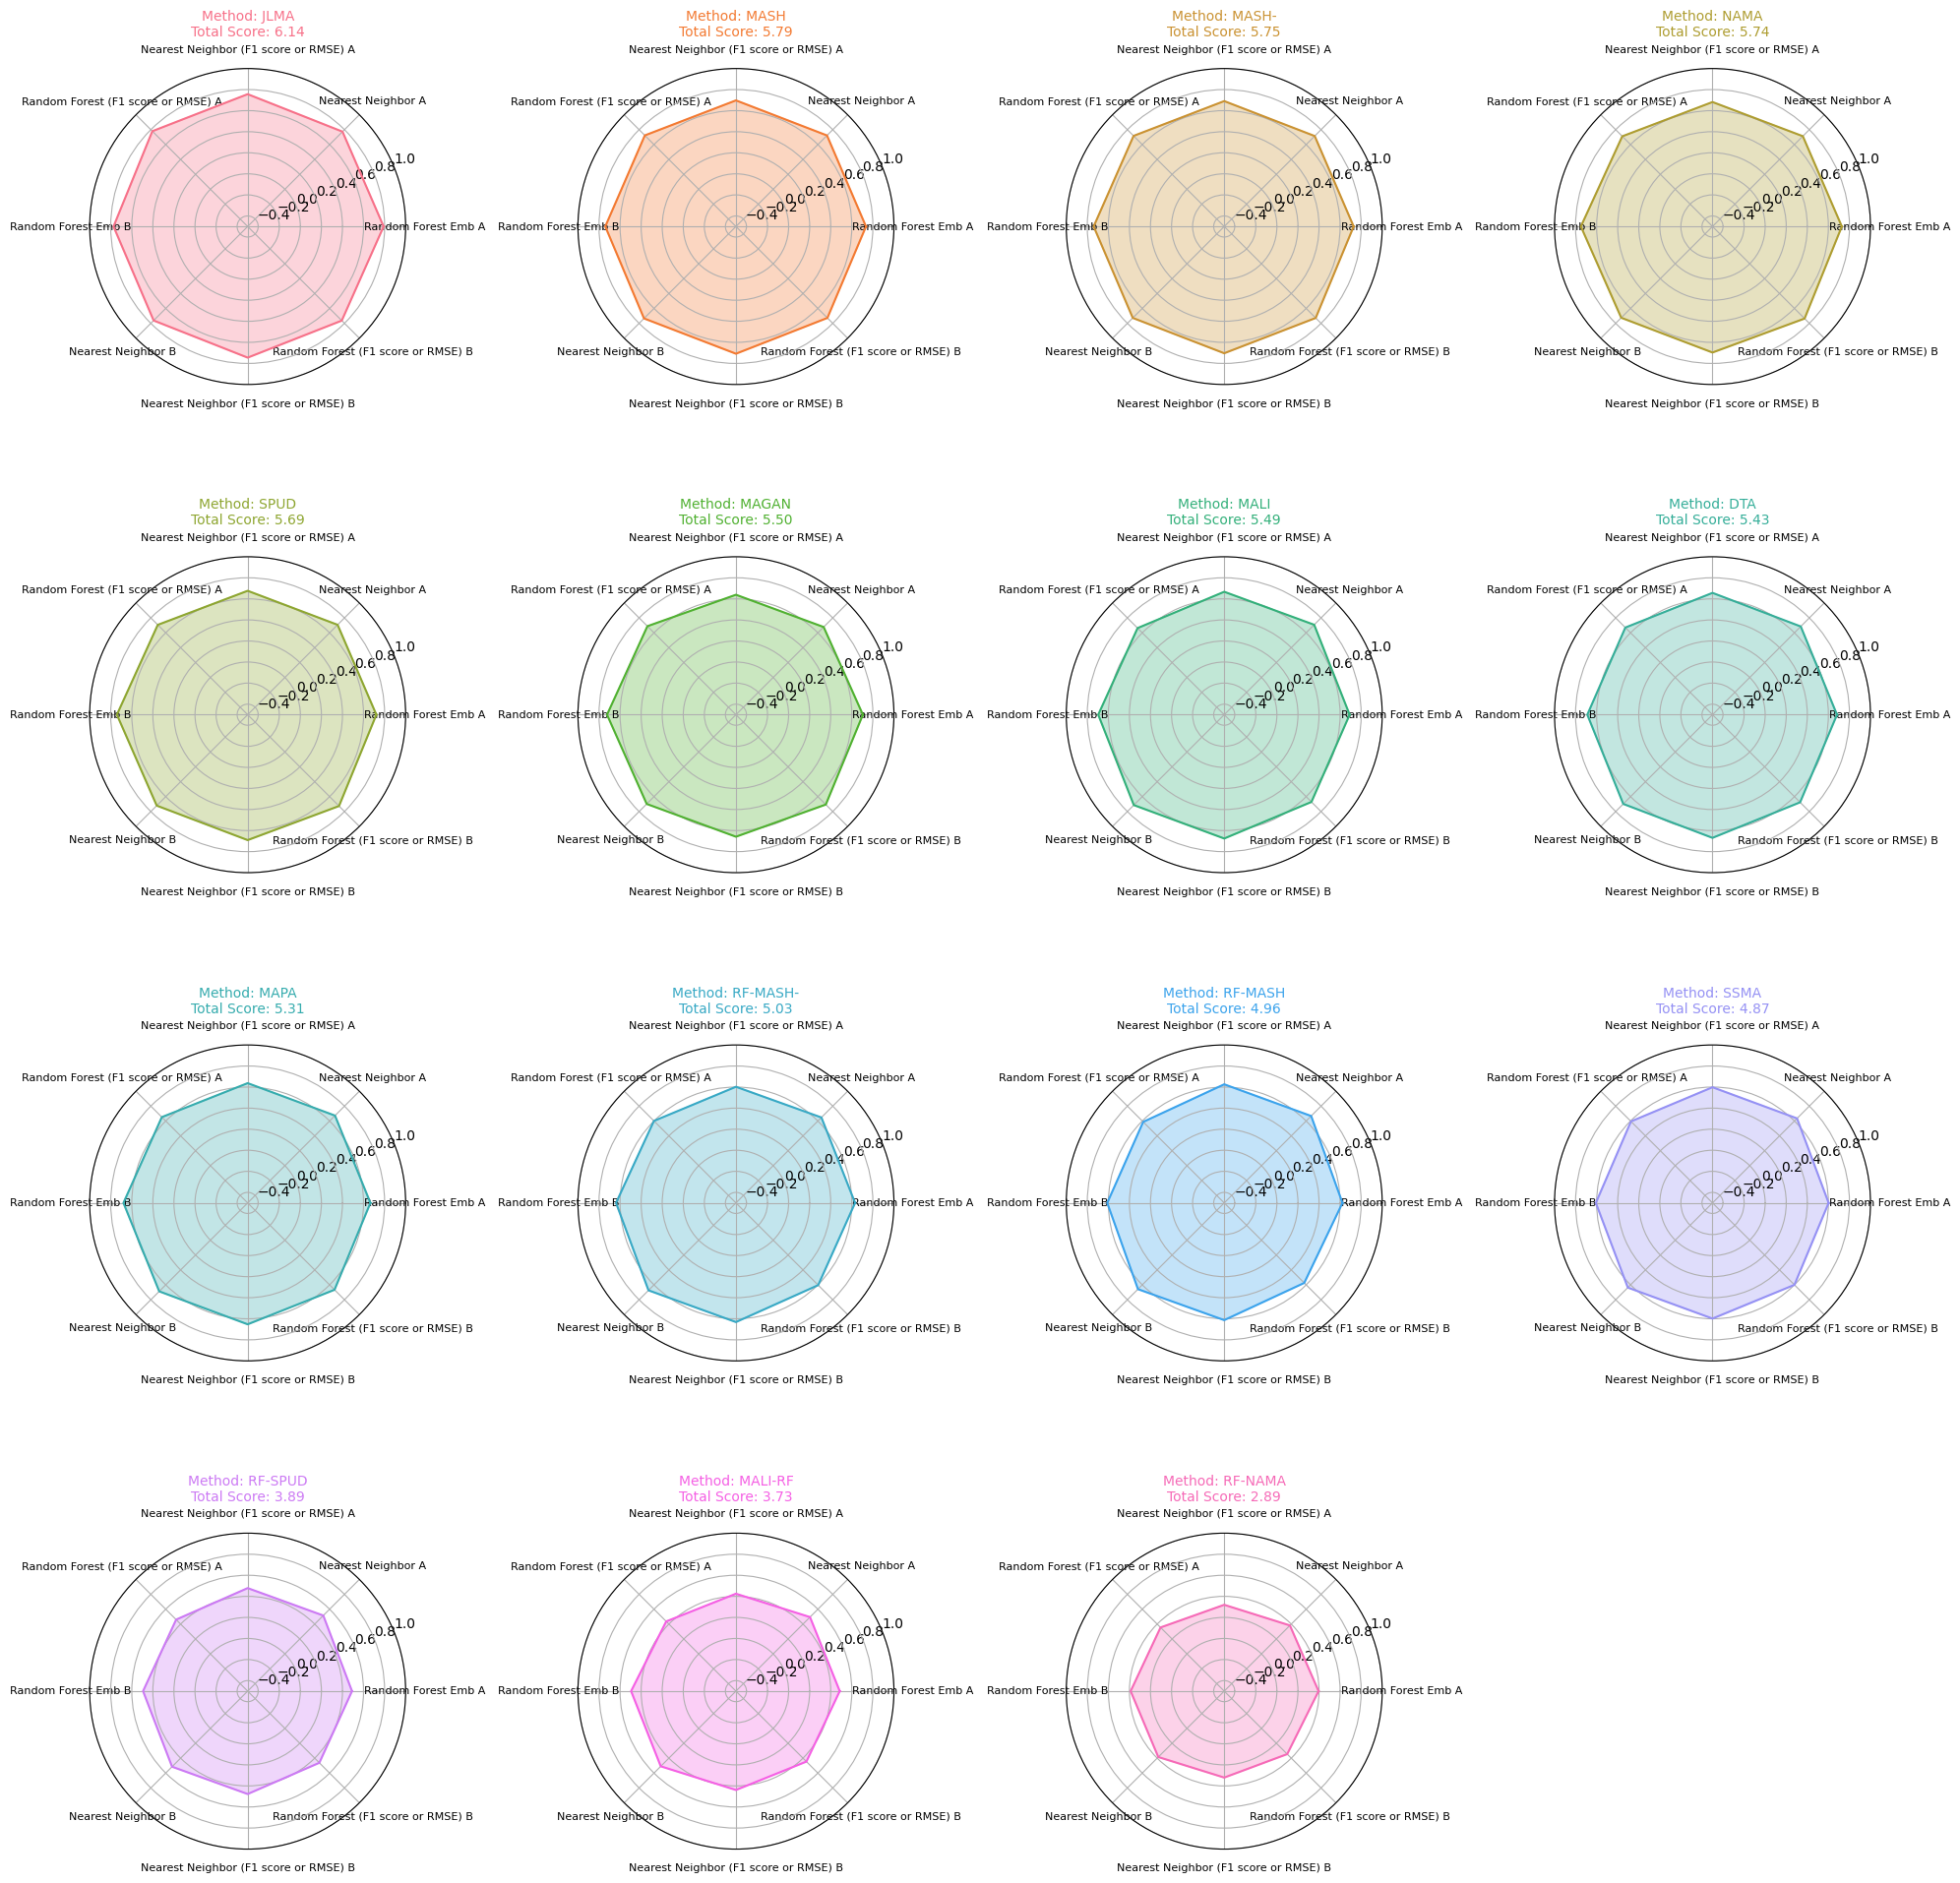

In [9]:
plot_radial(classification_df, [#'CE', 'FOSCTTM', 
                                #'Random Forest OOB', 
                                'Random Forest Emb A', 'Nearest Neighbor A', 'Nearest Neighbor (F1 score or RMSE) A', 'Random Forest (F1 score or RMSE) A',
                                'Random Forest Emb B', 'Nearest Neighbor B', 'Nearest Neighbor (F1 score or RMSE) B', 'Random Forest (F1 score or RMSE) B'])

In [13]:
# Rank each column's scores in results_df against each other
ranked_df = results_df.copy().set_index('csv_file').T
for col in ranked_df.columns:
    ranked_df[col] = ranked_df[col].rank(ascending=False)
ranked_df = ranked_df.T.reset_index()

ranked_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,9.0,15.0,2.0,11.0,8.0,7.0,6.0,13.0,14.0,1.0,4.0,NaN,16.0,12.0,10.0,5.0,3.0
1,hill_valley,4.0,14.0,3.0,12.0,6.0,7.0,1.0,10.0,13.0,2.0,17.0,16.0,15.0,11.0,5.0,8.0,9.0
2,CommunityCrime,10.0,12.0,1.0,9.0,5.0,4.0,11.0,14.0,15.0,2.0,3.0,NaN,16.0,13.0,8.0,7.0,6.0
3,heart_disease,3.0,14.0,1.0,12.0,4.5,4.5,15.0,16.0,13.0,2.0,6.0,11.0,17.0,8.0,10.0,9.0,7.0
4,Medicaldataset,5.0,10.0,4.0,NaN,7.0,6.0,8.0,NaN,NaN,3.0,NaN,NaN,12.0,11.0,1.0,9.0,2.0
5,Automobile,11.0,14.0,1.0,12.0,10.0,6.0,7.0,13.0,15.0,2.0,8.0,NaN,16.0,9.0,4.0,3.0,5.0
6,audiology,11.0,14.0,1.0,12.0,5.0,8.0,10.0,15.0,16.0,2.0,3.0,13.0,17.0,4.0,9.0,6.5,6.5
7,heart_failure,7.0,15.0,4.0,10.0,6.0,9.0,14.0,16.0,11.0,3.0,8.0,13.0,17.0,12.0,1.0,5.0,2.0
8,ConcreteSlumpTest,12.0,13.0,1.0,11.0,7.0,9.0,10.0,14.0,15.0,5.0,2.0,NaN,16.0,3.0,8.0,6.0,4.0
9,hepatitis,4.0,14.0,2.0,8.0,5.0,3.0,15.0,12.0,16.0,6.0,9.0,7.0,17.0,10.0,1.0,13.0,11.0


<Axes: >

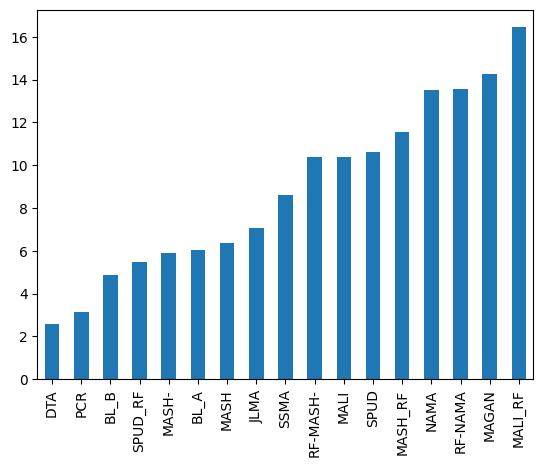

In [17]:
ranked_df.drop(columns= ["csv_file"]).mean().sort_values().plot(kind="bar")